Try to use an HMM on Nuclear generation data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import pylab
from collections import Counter
import time

In [14]:
from sklearn.model_selection import train_test_split

In [43]:
import pickle

In [ ]:
with open("HMM_1_GenFuelMix.pkl", "rb") as file: HMM_1_GenFuelMix = pickle.load(file)


In [63]:
readcsv_GenMix_2018_2022=pd.read_csv(r"..\ImportData\GenMix_2018_2022.csv")

In [62]:
GenMix_nanremoved = pd.read_pickle('GenMix_nanremoved.pkl')

In [4]:
GenMix_Consolidated = pd.read_pickle('GenMix_Consolidated.pkl')

The HMM lab functions would not be appropriate because the fitting is done by estimating known transition probabilities, and the observations are also discrete, not Gaussian.

HMM python libraries:

hmmlearn 0.2.8\
https://hmmlearn.readthedocs.io/en/latest/  \
https://hmmlearn.readthedocs.io/en/latest/tutorial.html  
https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn.hmm.GaussianHMM


In [6]:
import sys
!{sys.executable} -m pip install hmmlearn


     -------------------------------------- 110.1/110.1 kB 6.2 MB/s eta 0:00:00


In [7]:
from hmmlearn import hmm


### Examine Nuclear data

In [13]:
Nuclear = GenMix_Consolidated["Nuclear Total"]

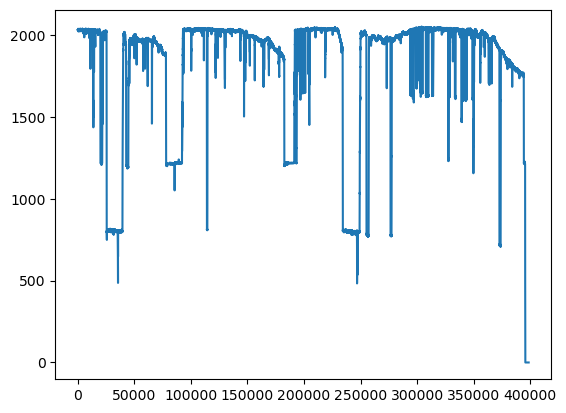

In [11]:
plt.plot(GenMix_Consolidated["Nuclear Total"])

Fundamentals:

SPP has two nuclear plants: 
1. Wolf Creek Generating Station in Kansas, 1200 MW.
2. Cooper Nuclear Station in Nebraska, 835 MW.

https://en.wikipedia.org/wiki/Cooper_Nuclear_Station \
https://en.wikipedia.org/wiki/Wolf_Creek_Generating_Station \
Looked at nuclear plant map
https://www.nppd.com/powering-nebraska/energy-resources/nuclear?locale=en

maybe can be modeled with 7-10 states?

In [16]:
nuclear_train, nuclear_test = train_test_split(Nuclear,train_size = .5,shuffle= False)

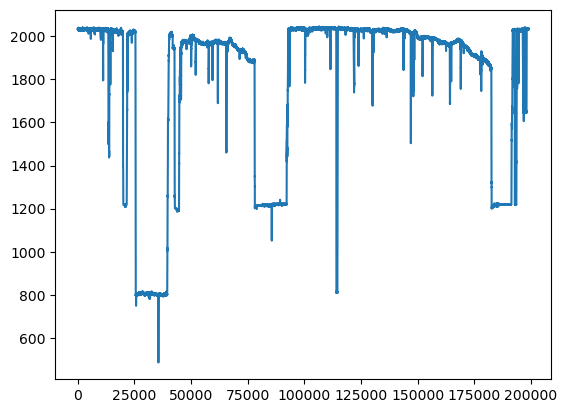

In [17]:
plt.plot(nuclear_train)

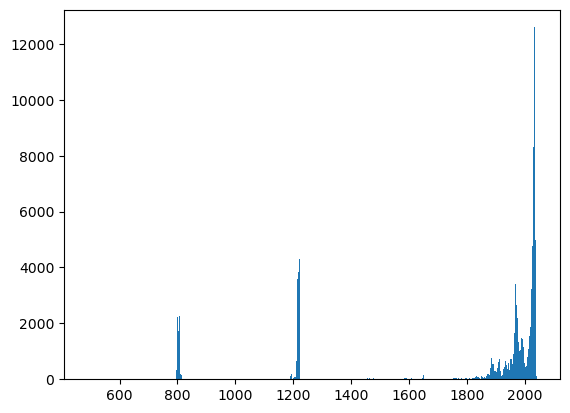

In [20]:
plt.hist(nuclear_train,1000)
plt.show()

### HMM 1

In [21]:
model = hmm.GaussianHMM(n_components=7, n_iter=100)

In [28]:
nuclear_train.values.reshape(-1, 1)

array([[2033.8, 2034.4, 2034. , ..., 2033.4, 2033.7, 2032.8]])

In [59]:
X = nuclear_train.values.reshape(-1, 1)

In [29]:
model.fit(nuclear_train.values.reshape(-1, 1))


GaussianHMM(n_components=7, n_iter=100)

In [ ]:
# takes a minute

In [33]:
Z2 = model.predict(X)


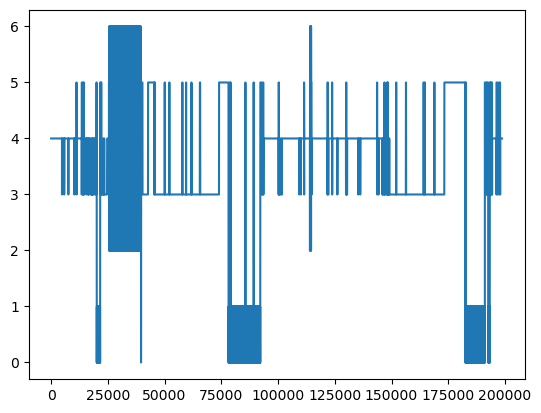

In [35]:
plt.plot(Z2)

(array([12354., 12356.,  7163., 63076., 73573., 23011.,  7160.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

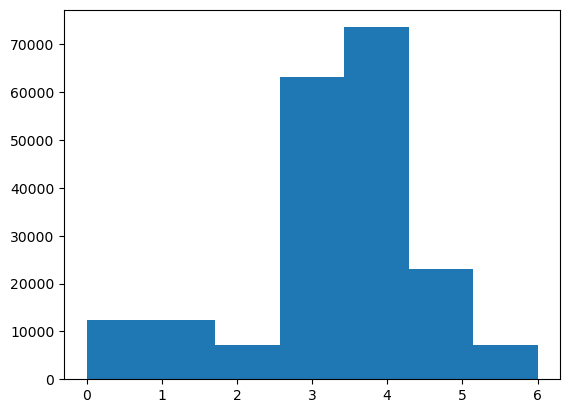

In [38]:
plt.hist(Z2,7)

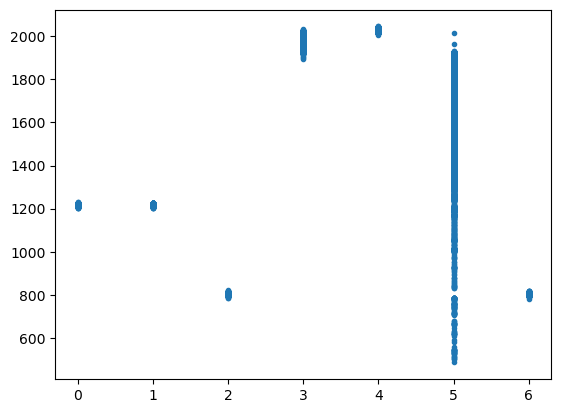

In [61]:
plt.plot(Z2,X,".")

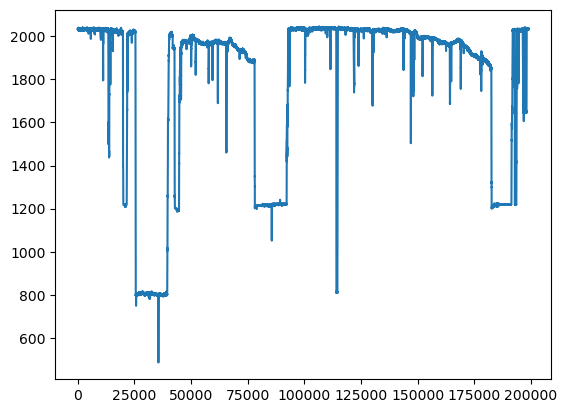

In [36]:
plt.plot(nuclear_train)

In [40]:
vars(model)

{'n_components': 7,
 'params': 'stmc',
 'init_params': 'stmc',
 'startprob_prior': 1.0,
 'transmat_prior': 1.0,
 'algorithm': 'viterbi',
 'random_state': None,
 'n_iter': 100,
 'tol': 0.01,
 'verbose': False,
 'implementation': 'log',
 'monitor_': ConvergenceMonitor(
     history=[-1516768.6838275902, -1360848.8198591555, -1149573.4950930986, -1105198.6919494744, -1088508.886255946, -1060392.7455423188, -1019236.9289396818, -941623.8705686126, -914834.3399547334, -871529.8777680709, -822710.5344904981, -789448.4536185559, -781978.8513009723, -779456.4007323527, -778321.9001745002, -776724.3047184179, -774647.9748111336, -773248.9529556329, -772634.3593178502, -771704.26404317, -771057.3765493317, -770997.4079003095, -770995.7926847745, -770995.6807982968, -770995.6692817693, -770995.6675226804],
     iter=26,
     n_iter=100,
     tol=0.01,
     verbose=False,
 ),
 'covariance_type': 'diag',
 'min_covar': 0.001,
 'means_prior': 0,
 'means_weight': 0,
 'covars_prior': 0.01,
 'covars_wei

(array([2., 0., 0., 2., 0., 0., 0., 1., 0., 2.]),
 array([ 804.13858204,  926.85887797, 1049.57917389, 1172.29946982,
        1295.01976574, 1417.74006167, 1540.46035759, 1663.18065352,
        1785.90094944, 1908.62124537, 2031.34154129]),
 <BarContainer object of 10 artists>)

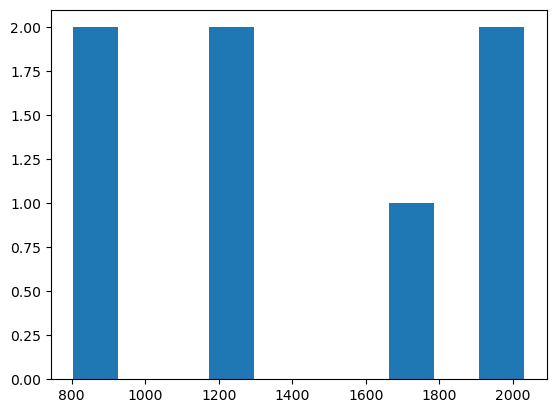

In [41]:
plt.hist(model.means_)

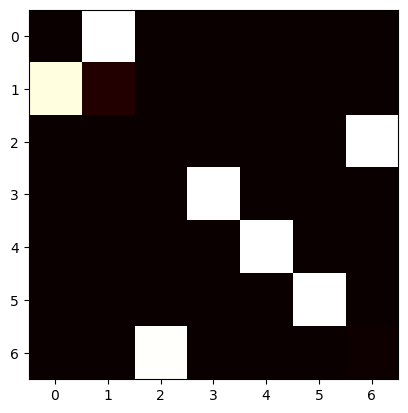

In [42]:
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')


Two of the states are redundant/equivalent to other states. Train with 5 latent states next

In [44]:
with open("HMM_1_GenFuelMix.pkl", "wb") as file: pickle.dump(model, file)


In [45]:
with open("HMM_1_GenFuelMix.pkl", "rb") as file: HMM_1_GenFuelMix = pickle.load(file)


In [46]:
HMM_1_GenFuelMix

GaussianHMM(n_components=7, n_iter=100)

In [47]:
model

GaussianHMM(n_components=7, n_iter=100)

Fundamentals:

SPP has two nuclear plants: 
1. Wolf Creek Generating Station in Kansas, 1200 MW.
2. Cooper Nuclear Station in Nebraska, 835 MW.

https://en.wikipedia.org/wiki/Cooper_Nuclear_Station \
https://en.wikipedia.org/wiki/Wolf_Creek_Generating_Station \
Looked at nuclear plant map
https://www.nppd.com/powering-nebraska/energy-resources/nuclear?locale=en

Sample

In [49]:
X, Z = model.sample(len(nuclear_train))


In [51]:
Xsamp = X
Zsamp = Z

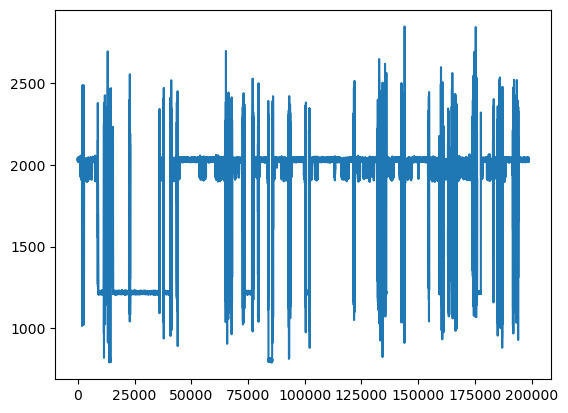

In [52]:
plt.plot(Xsamp)

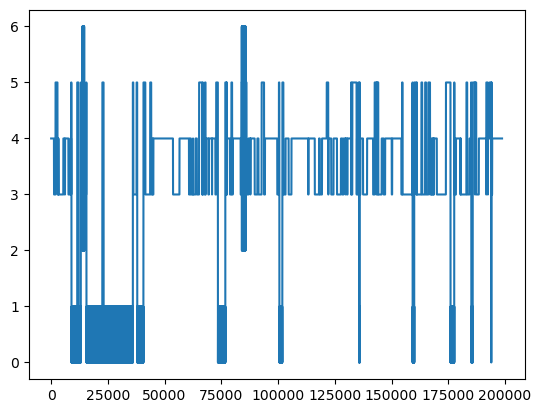

In [53]:
plt.plot(Zsamp)

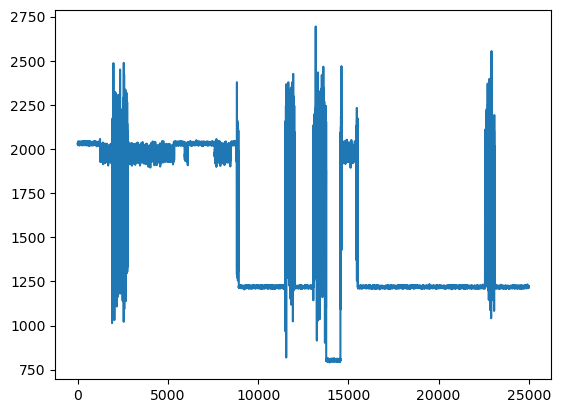

In [55]:
plt.plot(Xsamp[:25000])

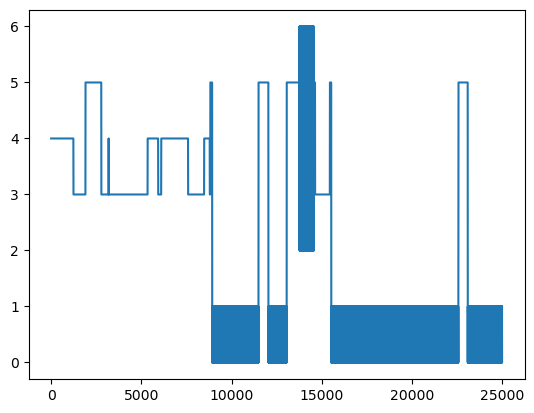

In [56]:
plt.plot(Zsamp[:25000])

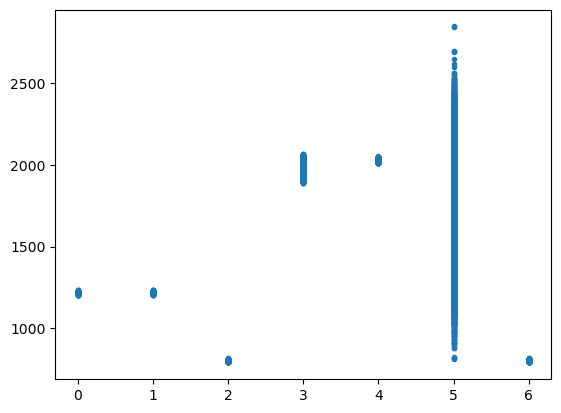

In [60]:
plt.plot(Zsamp,Xsamp,".")

State 5 takes in a lot more variance than expect

### HMM 2

In [64]:
model2 = hmm.GaussianHMM(n_components=5, n_iter=100)

In [28]:
nuclear_train.values.reshape(-1, 1)

array([[2033.8, 2034.4, 2034. , ..., 2033.4, 2033.7, 2032.8]])

In [65]:
Xtrain = nuclear_train.values.reshape(-1, 1)

In [69]:
X = nuclear_train.values.reshape(-1, 1)

In [66]:
import time
start = time.process_time()
# your code here    
print(time.process_time() - start)


0.0


In [67]:
start = time.process_time()

model2.fit(Xtrain)

print(time.process_time() - start)


40.265625


In [ ]:
# takes 40s

In [70]:
Zpredict = model2.predict(Xtrain)


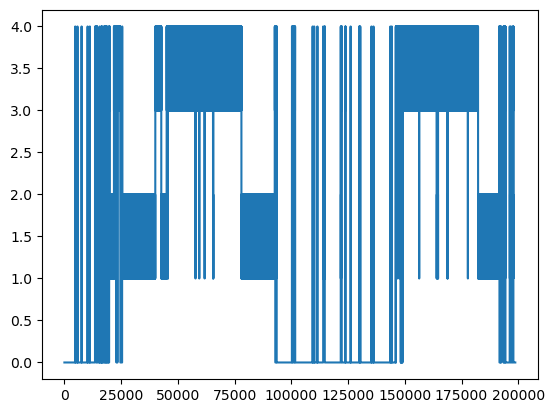

In [71]:
plt.plot(Zpredict)

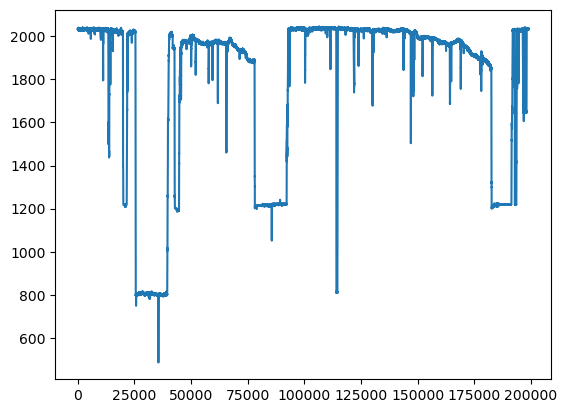

In [74]:
plt.plot(nuclear_train)

(array([73545., 23408., 23446., 39134., 39160.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

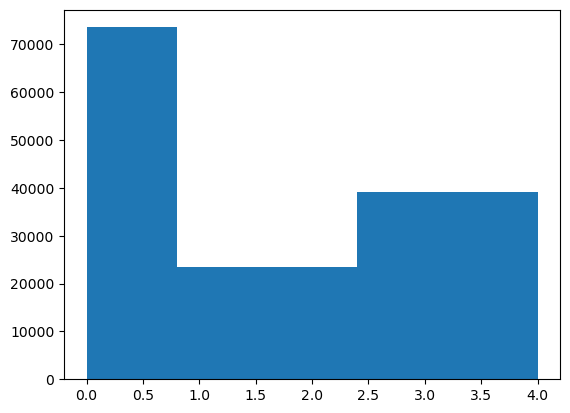

In [72]:
plt.hist(Zpredict,5)

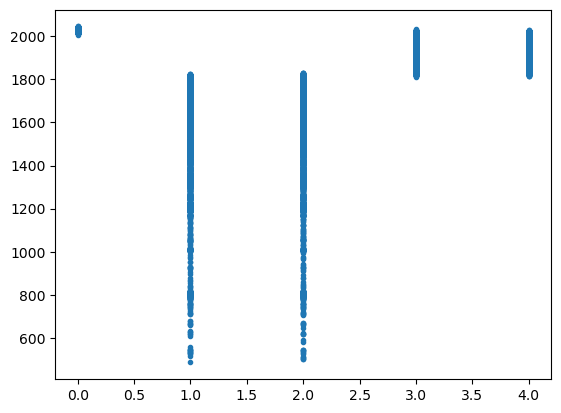

In [73]:
plt.plot(Zpredict,Xtrain,".")

In [75]:
vars(model2)

{'n_components': 5,
 'params': 'stmc',
 'init_params': 'stmc',
 'startprob_prior': 1.0,
 'transmat_prior': 1.0,
 'algorithm': 'viterbi',
 'random_state': None,
 'n_iter': 100,
 'tol': 0.01,
 'verbose': False,
 'implementation': 'log',
 'monitor_': ConvergenceMonitor(
     history=[-1501596.9969220534, -1255366.1483291546, -1129592.9641633627, -1124694.4593723656, -1123954.3313172502, -1123444.7411740306, -1122561.9658235426, -1121132.4360677798, -1119226.5847080732, -1117301.373158806, -1115753.5938060055, -1114593.6268745796, -1113634.8258859648, -1112612.049089956, -1111072.9765488748, -1107970.4249937106, -1100204.622952129, -1077170.9947165218, -1016346.0118768421, -959077.4752600072, -949588.1515152914, -948772.3657057608, -948403.0157202918, -948274.4408937552, -948257.8407277843, -948253.8674647379, -948253.1862084398, -948253.1187709129, -948253.1127580763],
     iter=29,
     n_iter=100,
     tol=0.01,
     verbose=False,
 ),
 'covariance_type': 'diag',
 'min_covar': 0.001,
 '

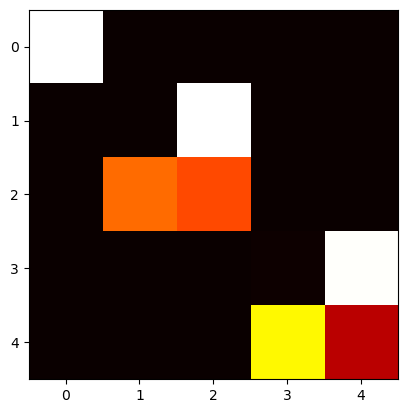

In [87]:
plt.imshow(model2.transmat_, cmap='hot', interpolation='nearest')


In [76]:
# generally not great, high variances

In [77]:
with open("HMM_2_5states_GenFuelMix.pkl", "wb") as file: pickle.dump(model2, file)


### HMM 3
6 states

In [78]:
model3 = hmm.GaussianHMM(n_components=6, n_iter=100)

In [79]:
Xtrain = nuclear_train.values.reshape(-1, 1)

In [80]:
X = nuclear_train.values.reshape(-1, 1)

In [81]:
start = time.process_time()

model3.fit(Xtrain)

print(time.process_time() - start)


50.15625


In [ ]:
# takes 50s

In [82]:
Zpredict = model3.predict(Xtrain)


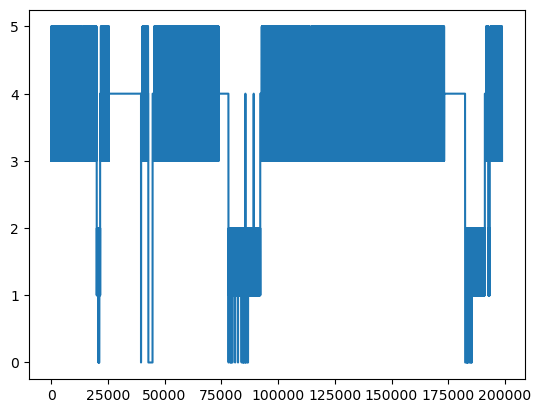

In [83]:
plt.plot(Zpredict)

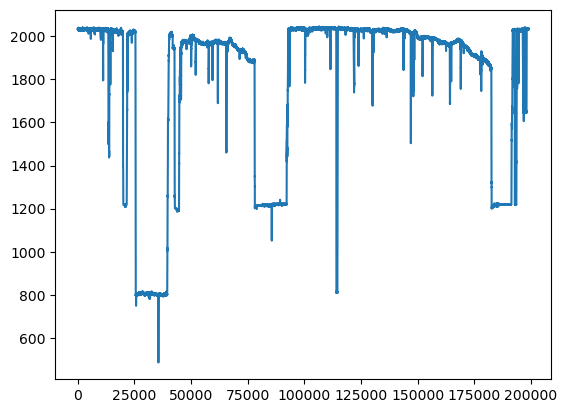

In [84]:
plt.plot(nuclear_train)

(array([ 4466., 11166., 11194., 68135., 35559., 68173.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

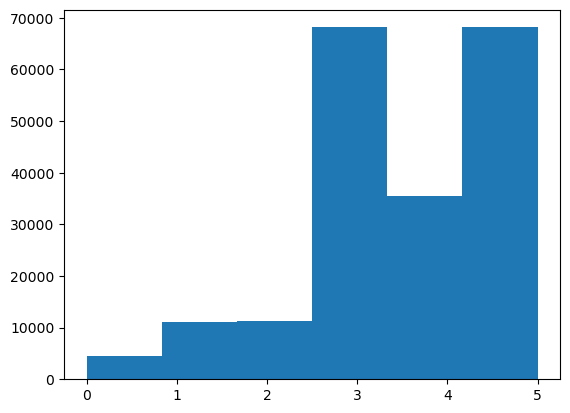

In [85]:
plt.hist(Zpredict,6)

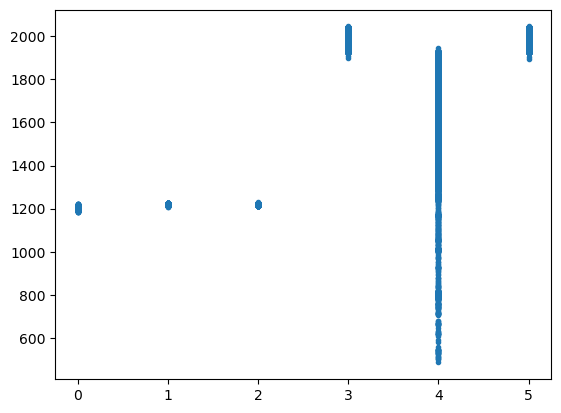

In [89]:
plt.plot(Zpredict,Xtrain,".")

In [88]:
vars(model3)

{'n_components': 6,
 'params': 'stmc',
 'init_params': 'stmc',
 'startprob_prior': 1.0,
 'transmat_prior': 1.0,
 'algorithm': 'viterbi',
 'random_state': None,
 'n_iter': 100,
 'tol': 0.01,
 'verbose': False,
 'implementation': 'log',
 'monitor_': ConvergenceMonitor(
     history=[-1453236.8776409968, -1268444.6590913406, -1142723.6871099006, -1126548.0795971465, -1124302.9685112184, -1121783.7032181153, -1109408.0708317717, -1086115.645051543, -1073047.787558099, -1054549.6620381277, -1024878.8107255552, -1022732.0617024521, -1021006.8541774855, -1019211.1618964876, -1018548.0234816545, -1017585.0209112568, -1016898.5049460166, -1016812.9130211803, -1016807.0350849617, -1013903.8520385528, -1008089.9967294402, -1005420.6414375058, -1004938.2875839436, -1004906.7718387643, -1004890.8048066002, -1004890.6624054826, -1004890.6596693232],
     iter=27,
     n_iter=100,
     tol=0.01,
     verbose=False,
 ),
 'covariance_type': 'diag',
 'min_covar': 0.001,
 'means_prior': 0,
 'means_weight

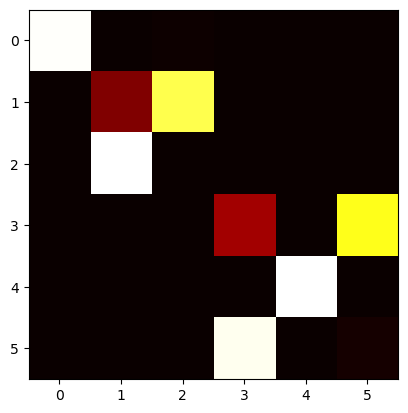

In [92]:
plt.imshow(model3.transmat_, cmap='hot', interpolation='nearest')


In [76]:
# generally not great, high variances

In [90]:
with open("HMM_3_6states_GenFuelMix.pkl", "wb") as file: pickle.dump(model3, file)


### model comparison

Likelihood

In [95]:
model.score(X)


-770995.6669358049

In [94]:
model2.score(X)


-948253.1120031378

In [93]:
model3.score(X)


-1004890.65952904

first model best on likelihood